In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [9]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [11]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])


In [13]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [15]:
# Classify as Pass if Exam_Score >= 70, else Fail
df['Result'] = df['Exam_Score'].apply(lambda x: 'Pass' if x >= 70 else 'Fail')

In [17]:
# See how many Pass and Fail labels we have
df['Result'].value_counts()


Result
Fail    4982
Pass    1625
Name: count, dtype: int64

In [19]:
df['Result'] = df['Exam_Score'].apply(lambda x: 'Pass' if x >= 65 else 'Fail')
df['Result'].value_counts()


Result
Pass    5155
Fail    1452
Name: count, dtype: int64

In [21]:
df['Result'] = df['Exam_Score'].apply(lambda x: 'Pass' if x >= 68 else 'Fail')
df['Result'].value_counts()


Result
Fail    3599
Pass    3008
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['Gender', 'Internet_Access', 'School_Type', 'Learning_Disabilities']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [25]:
multi_class_cols = ['Parental_Education_Level', 'Teacher_Quality', 'Peer_Influence',
                    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Family_Income', 'Distance_from_Home']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

In [27]:
df.drop(columns=['Exam_Score'], inplace=True)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hours_Studied                          6607 non-null   int64 
 1   Attendance                             6607 non-null   int64 
 2   Sleep_Hours                            6607 non-null   int64 
 3   Previous_Scores                        6607 non-null   int64 
 4   Internet_Access                        6607 non-null   int32 
 5   Tutoring_Sessions                      6607 non-null   int64 
 6   School_Type                            6607 non-null   int32 
 7   Physical_Activity                      6607 non-null   int64 
 8   Learning_Disabilities                  6607 non-null   int32 
 9   Gender                                 6607 non-null   int32 
 10  Result                                 6607 non-null   object
 11  Parental_Educatio

In [31]:
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Now view the dataset
df.head()  # or df.sample(10)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,Gender,Result,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Motivation_Level_Low,Motivation_Level_Medium,Family_Income_Low,Family_Income_Medium,Distance_from_Home_Moderate,Distance_from_Home_Near
0,23,84,7,73,1,0,1,3,0,1,Fail,True,False,False,True,False,True,True,False,False,False,False,True,False,True,False,False,True
1,19,64,8,59,1,2,1,4,0,0,Fail,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,True,False
2,24,98,7,91,1,2,1,4,0,1,Pass,False,True,False,True,True,False,False,True,False,True,True,False,True,False,True,False,True
3,29,89,8,98,1,1,1,4,0,1,Pass,True,False,False,True,False,False,True,False,False,True,True,False,True,False,True,True,False
4,19,92,6,65,1,3,1,4,0,0,Pass,False,False,False,False,True,False,False,True,False,True,True,False,True,False,True,False,True


In [37]:
df.head() 

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,Gender,Result,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Motivation_Level_Low,Motivation_Level_Medium,Family_Income_Low,Family_Income_Medium,Distance_from_Home_Moderate,Distance_from_Home_Near
0,23,84,7,73,1,0,1,3,0,1,Fail,True,False,False,True,False,True,True,False,False,False,False,True,False,True,False,False,True
1,19,64,8,59,1,2,1,4,0,0,Fail,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,True,False
2,24,98,7,91,1,2,1,4,0,1,Pass,False,True,False,True,True,False,False,True,False,True,True,False,True,False,True,False,True
3,29,89,8,98,1,1,1,4,0,1,Pass,True,False,False,True,False,False,True,False,False,True,True,False,True,False,True,True,False
4,19,92,6,65,1,3,1,4,0,0,Pass,False,False,False,False,True,False,False,True,False,True,True,False,True,False,True,False,True


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hours_Studied                          6607 non-null   int64 
 1   Attendance                             6607 non-null   int64 
 2   Sleep_Hours                            6607 non-null   int64 
 3   Previous_Scores                        6607 non-null   int64 
 4   Internet_Access                        6607 non-null   int32 
 5   Tutoring_Sessions                      6607 non-null   int64 
 6   School_Type                            6607 non-null   int32 
 7   Physical_Activity                      6607 non-null   int64 
 8   Learning_Disabilities                  6607 non-null   int32 
 9   Gender                                 6607 non-null   int32 
 10  Result                                 6607 non-null   object
 11  Parental_Educatio

In [41]:
df['Result'] = df['Result'].map({'Fail': 0, 'Pass': 1})

In [43]:
df.head() 

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,Gender,Result,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Motivation_Level_Low,Motivation_Level_Medium,Family_Income_Low,Family_Income_Medium,Distance_from_Home_Moderate,Distance_from_Home_Near
0,23,84,7,73,1,0,1,3,0,1,0,True,False,False,True,False,True,True,False,False,False,False,True,False,True,False,False,True
1,19,64,8,59,1,2,1,4,0,0,0,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,True,False
2,24,98,7,91,1,2,1,4,0,1,1,False,True,False,True,True,False,False,True,False,True,True,False,True,False,True,False,True
3,29,89,8,98,1,1,1,4,0,1,1,True,False,False,True,False,False,True,False,False,True,True,False,True,False,True,True,False
4,19,92,6,65,1,3,1,4,0,0,1,False,False,False,False,True,False,False,True,False,True,True,False,True,False,True,False,True


In [45]:
X = df.drop('Result', axis=1)
y = df['Result']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:
# Save to CSV
df.to_csv('preprocessed_student_data.csv', index=False)

print("Dataset saved successfully as 'preprocessed_student_data.csv'")


Dataset saved successfully as 'preprocessed_student_data.csv'


In [71]:
#---------------Exploratory Data Analysis------------------#

In [49]:
print("Shape of dataset:", df.shape)
print("\nColumn types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())


Shape of dataset: (6607, 28)

Column types:
 Hours_Studied                            int64
Attendance                               int64
Sleep_Hours                              int64
Previous_Scores                          int64
Internet_Access                          int32
Tutoring_Sessions                        int64
School_Type                              int32
Physical_Activity                        int64
Learning_Disabilities                    int32
Gender                                   int32
Result                                   int64
Parental_Education_Level_High School      bool
Parental_Education_Level_Postgraduate     bool
Teacher_Quality_Low                       bool
Teacher_Quality_Medium                    bool
Peer_Influence_Neutral                    bool
Peer_Influence_Positive                   bool
Parental_Involvement_Low                  bool
Parental_Involvement_Medium               bool
Access_to_Resources_Low                   bool
Access_to_Resou

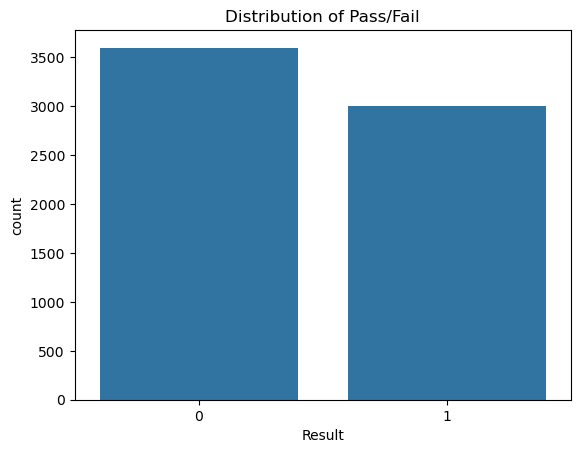

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Result')
plt.title('Distribution of Pass/Fail')
plt.show()


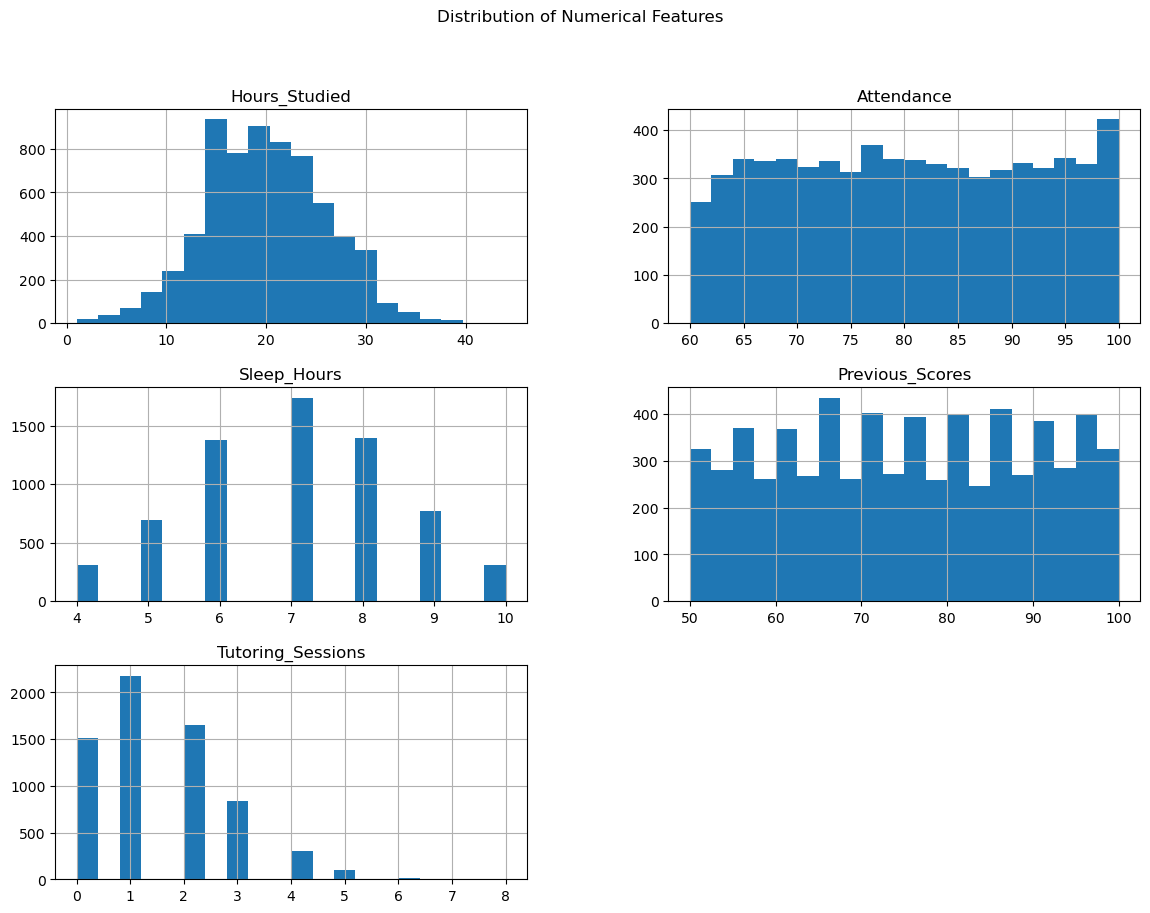

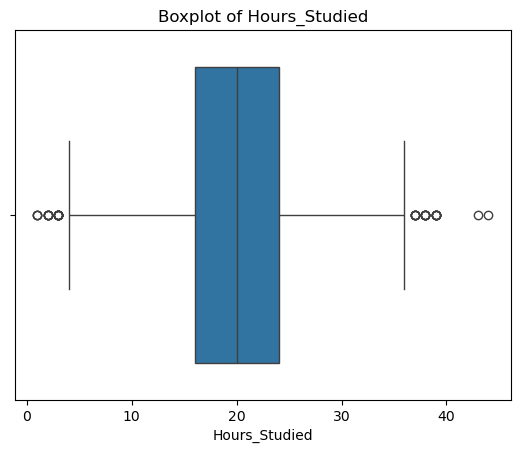

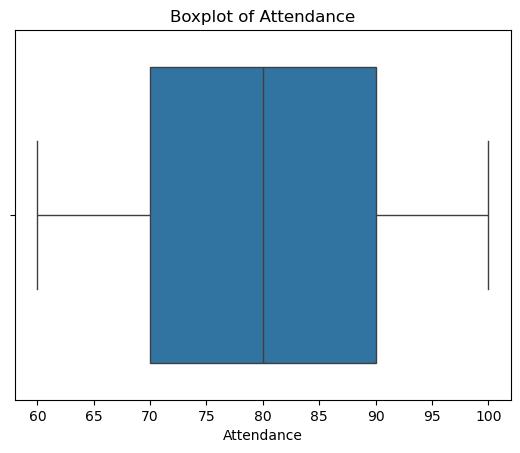

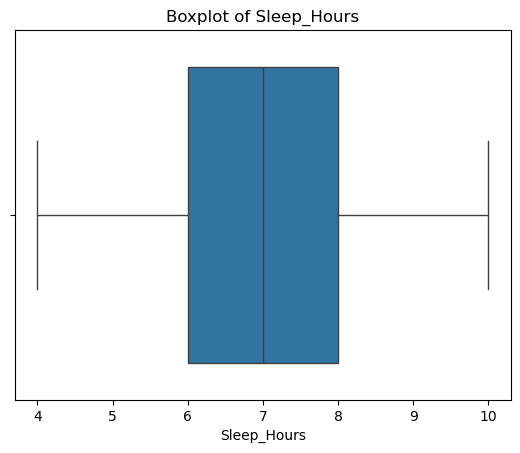

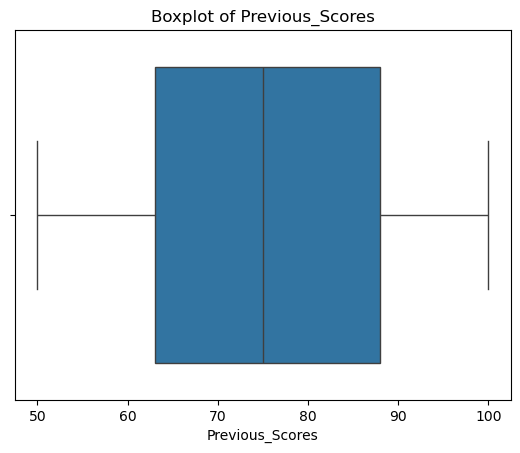

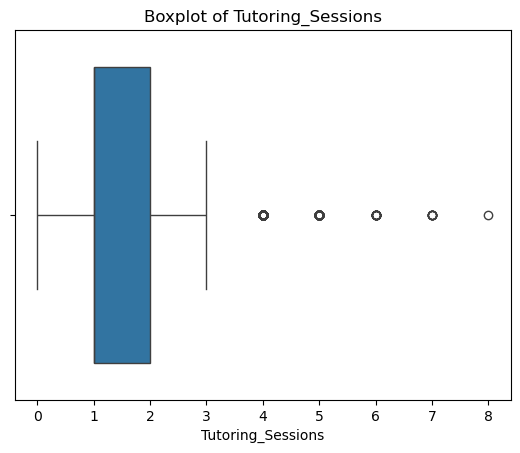

In [79]:
num_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions']

# Histograms
df[num_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Boxplots for Outlier Detection
for col in num_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


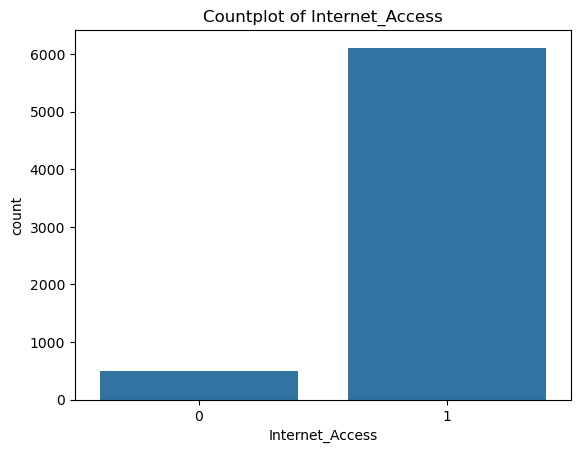

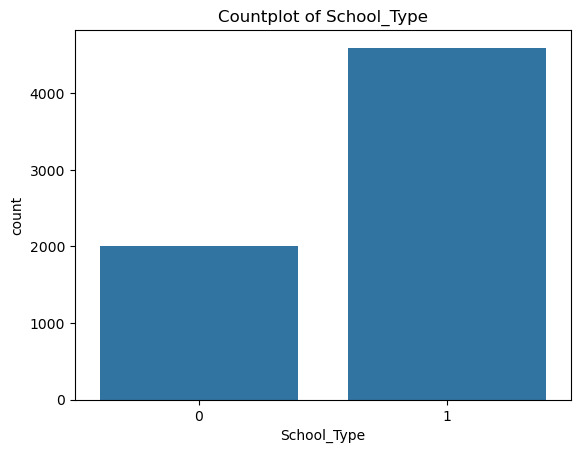

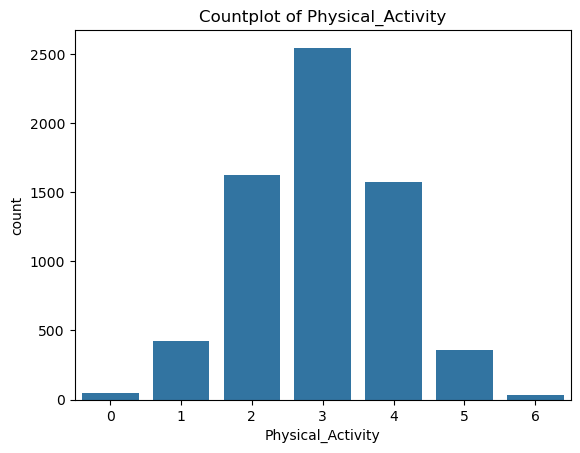

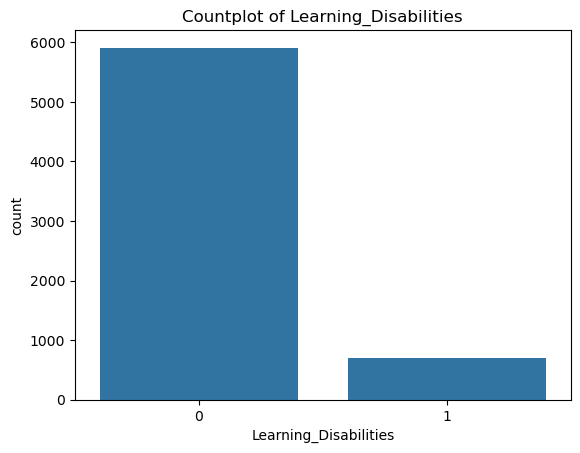

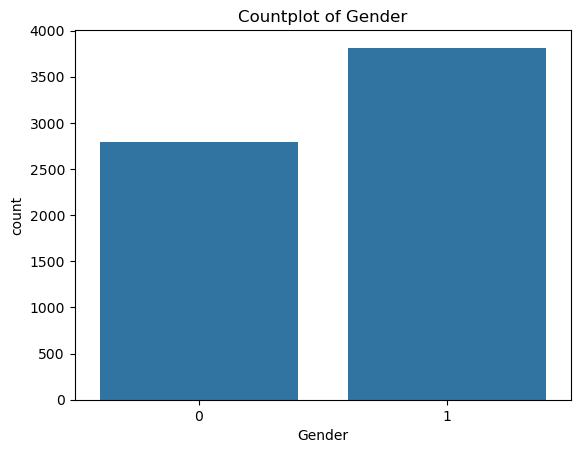

In [81]:
cat_cols = ['Internet_Access', 'School_Type', 'Physical_Activity', 'Learning_Disabilities', 'Gender']

for col in cat_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.show()


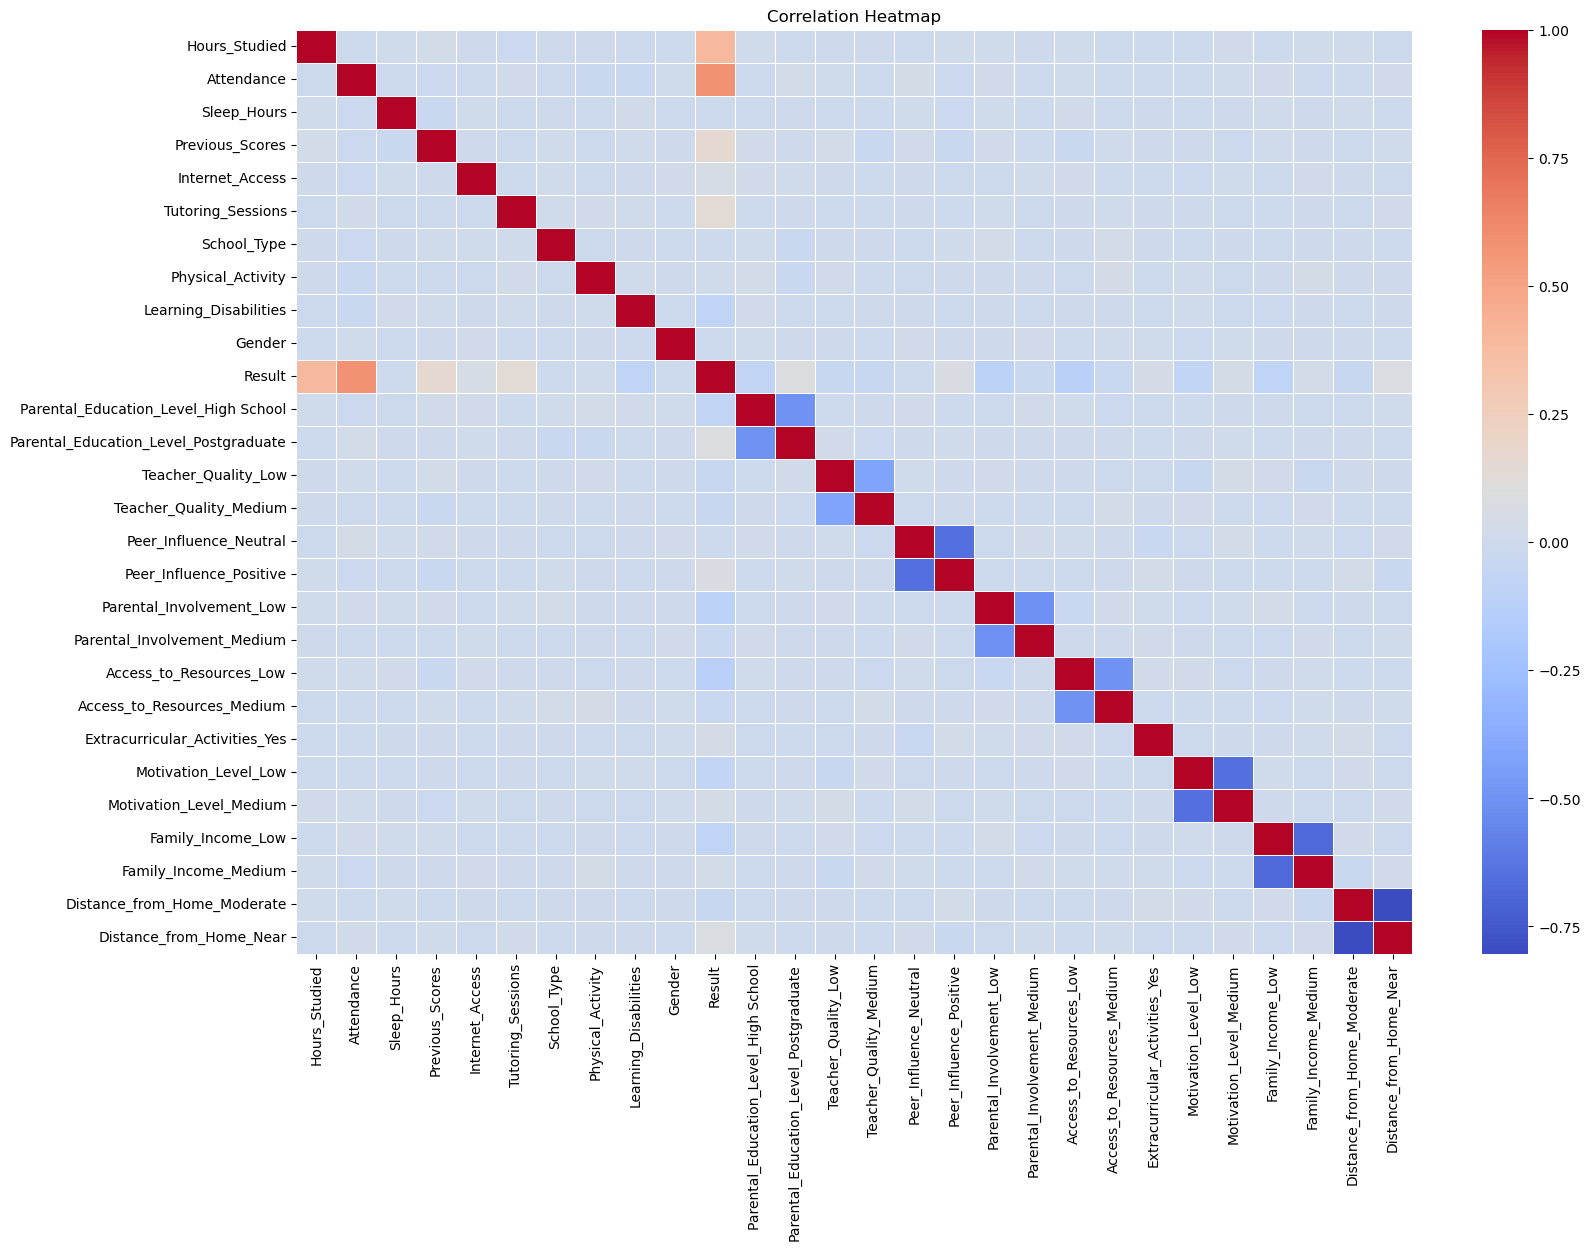

In [83]:
import numpy as np

# Convert boolean columns to int
df_corr = df.copy()
df_corr = df_corr.astype(int)

plt.figure(figsize=(18, 12))
sns.heatmap(df_corr.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [51]:
import pandas as pd
import numpy as np

# Define capping function
def cap_outliers(df, column):
    lower = df[column].quantile(0.05)
    upper = df[column].quantile(0.95)
    df[column] = np.where(df[column] < lower, lower, df[column])
    df[column] = np.where(df[column] > upper, upper, df[column])
    return df

# Apply to outlier-prone columns
for col in ['Hours_Studied', 'Tutoring_Sessions']:
    df = cap_outliers(df, col)


In [53]:
from sklearn.preprocessing import StandardScaler

features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


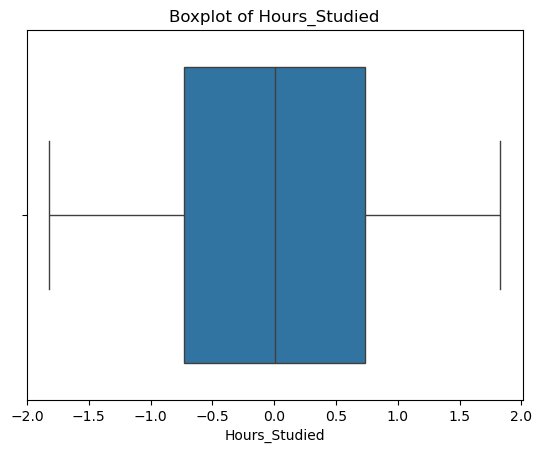

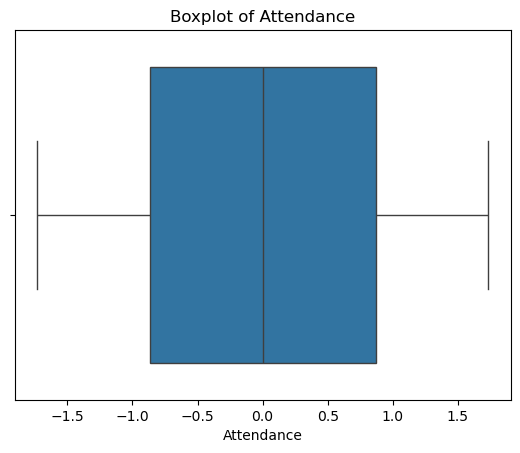

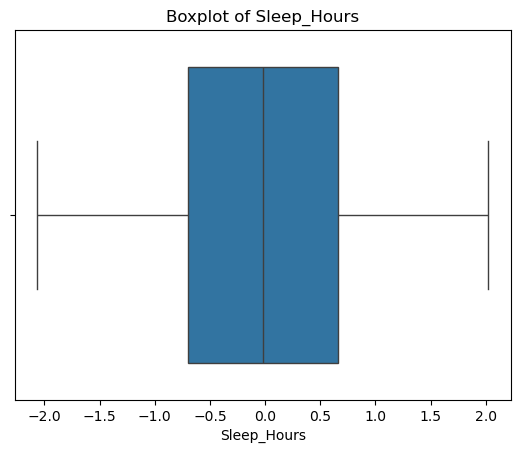

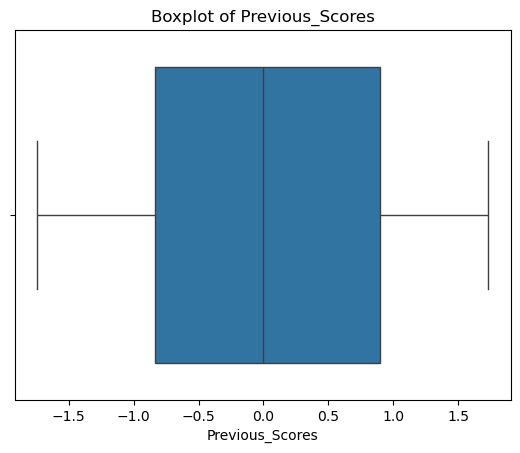

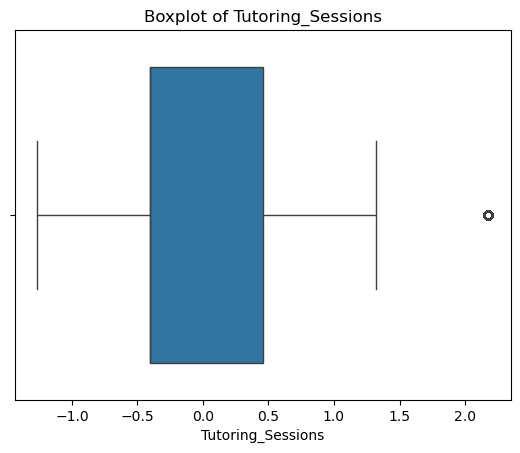

In [89]:
for col in num_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


In [91]:
# Save to CSV
df.to_csv('preprocessed_student_data_v2.csv', index=False)

print("Dataset saved successfully as 'preprocessed_student_dat_v2.csv'")

Dataset saved successfully as 'preprocessed_student_dat_v2.csv'


In [97]:
#---------------Model Training-----------#

In [55]:
#Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# X and y
X = df[features]
y = df['Result']  # Replace with your actual target column name

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.27696390589377334
RMSE: 0.3357881730446553
R2 Score: 0.546594283100861


In [57]:
X_train.shape

(5285, 5)

In [63]:
# Features (X) and Target (y)
X = df.drop('Result', axis=1)
y = df['Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
X_train.shape

(5285, 27)

In [67]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Fit on training data
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[656  64]
 [ 79 523]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       720
           1       0.89      0.87      0.88       602

    accuracy                           0.89      1322
   macro avg       0.89      0.89      0.89      1322
weighted avg       0.89      0.89      0.89      1322

Accuracy Score: 0.8918305597579426


In [71]:
pip install xgboost

In [77]:
from xgboost import XGBClassifier
gb_model = XGBClassifier(eval_metric='logloss', random_state=42)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))


Confusion Matrix:
 [[666  54]
 [ 43 559]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       720
           1       0.91      0.93      0.92       602

    accuracy                           0.93      1322
   macro avg       0.93      0.93      0.93      1322
weighted avg       0.93      0.93      0.93      1322

Accuracy Score: 0.926626323751891


C:\Users\abhay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:58:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [81]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


In [85]:
rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=2)


In [87]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [89]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
 [[653  67]
 [ 66 536]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       720
           1       0.89      0.89      0.89       602

    accuracy                           0.90      1322
   macro avg       0.90      0.90      0.90      1322
weighted avg       0.90      0.90      0.90      1322


Accuracy Score: 0.8993948562783661


In [91]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [93]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2406, number of negative: 2879
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 5285, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.455251 -> initscore=-0.179477
[LightGBM] [Info] Start training from score -0.179477


In [95]:
print(X_train.shape)
print(X_train.columns)


(5285, 27)
Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Internet_Access', 'Tutoring_Sessions', 'School_Type',
       'Physical_Activity', 'Learning_Disabilities', 'Gender',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate', 'Teacher_Quality_Low',
       'Teacher_Quality_Medium', 'Peer_Influence_Neutral',
       'Peer_Influence_Positive', 'Parental_Involvement_Low',
       'Parental_Involvement_Medium', 'Access_to_Resources_Low',
       'Access_to_Resources_Medium', 'Extracurricular_Activities_Yes',
       'Motivation_Level_Low', 'Motivation_Level_Medium', 'Family_Income_Low',
       'Family_Income_Medium', 'Distance_from_Home_Moderate',
       'Distance_from_Home_Near'],
      dtype='object')


In [97]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the model
model = lgb.LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2406, number of negative: 2879
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 5285, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.455251 -> initscore=-0.179477
[LightGBM] [Info] Start training from score -0.179477
Confusion Matrix:
 [[667  53]
 [ 44 558]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       720
           1       0.91      0.93      0.92       602

    accuracy                           0.93      1322
   macro avg       0.93      0.93      0.93      1322
weighted avg       0.93    

In [155]:
import joblib
joblib.dump(model, 'student_performance_model.pkl')


['student_performance_model.pkl']